In [1]:
# importar bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [4]:



# Função odeint para OD/DBO analítica 
# dLdt = -kd*L ; dODdt = -kd*L + kd*(Os - OD)

def funcao (z, t):
    # Constantes da reação

    Os = 9.0
    kd = 0.5

    L, OD = z # Definir as 'variaveis variaveis'

    # Definir as funções
    dLdt = -kd*L
    dODdt = -kd*L + kd*(Os - OD)

    return dLdt, dODdt

# Condições iniciais

L0 = 100.0
OD0 = 8.0
z0 = L0, OD0


# Passo no tempo

t = np.linspace(0,100,300)


In [5]:
# Integrar as equações com odeint

funcao_resolvida = odeint(funcao, z0, t)
L, OD = funcao_resolvida.T

C:\Users\User\AppData\Local\Temp/ipykernel_13304/3729678290.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


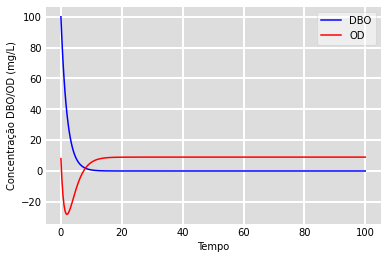

In [6]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (t, L, 'b', label = 'DBO')
ax.plot (t, OD, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


In [20]:
# Utilizando as equações OD/DBO + cargas (w)

# Função DBO/OD 
# dLdt = -kd * L + w1/V ; dODdt = -kd*L + ka*(Os-OD) + w2/V

def funcao2 (z, t):

    # Constantes da reação

    Os = 9.0
    kd = 0.5
    ka = 0.3
    w1 = 20
    w2 = 5
    V = 100 

    L, OD = z

    dLdt = -kd*L +w1/V
    dODdt = -kd*L + ka*(Os - OD) + w2/V

    return dLdt, dODdt

# Condições iniciais

L0 = 100.0
OD0 = 8.0
z_in = L0, OD0


# Passo no tempo

dt = np.linspace(0,100,300)

In [21]:
funcao_carga = odeint(funcao2, z_in, dt)
L1, OD1 = funcao_carga.T

C:\Users\User\AppData\Local\Temp/ipykernel_13304/604760211.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


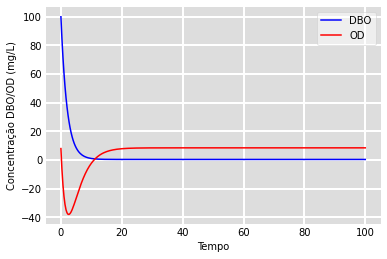

In [22]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (dt, L1, 'b', label = 'DBO')
ax.plot (dt, OD1, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [45]:
# Utilizando as equações OD/DBO + cargas (w) + balanço hidrico simplificado

# Função DBO/OD 

# VdLdt + L*bal_hid = -kd * L * V + w1 - Q_saida*L ; 
# dLdt = -L * ((bal_hid + Q_saida + kd*V)/V) + w1/V 
# dLdt = -L * m1 + carga1

# VdODdt + OD*bal_hid = -kd*L*V + ka*(Os-OD) * V + w2 - Q_saida*OD;
# dODdt = -OD * ((bal_hid + Q_saida - ka * V)/V) + w2/V - kd*L + ka*Os
# dODdt = -OD * m2 + carga2

# bal_hid = Q_1 + Q_2 - Q_saida

def funcao3 (z, t):

    L, OD = z
    
    # Constantes da reação

    Os = 9.0
    kd = 0.15
    ka = 0.3
    w1 = 20.0
    w2 = 5.0
    V = 100

    Q_1 = 0.5
    Q_2 = 0.5
    Q_saida = 0.2 
    bal_hid = Q_1 + Q_2 - Q_saida

    m1 = ((bal_hid + kd*V + Q_saida)/V)
    m2 = ((bal_hid - ka * V + Q_saida)/V)
    carga1 = w1/V
    carga2 = w2/V - kd*L + ka*Os
  

    dLdt = -L*m1 + carga1
    dODdt = -OD*m2 + carga2
    

    return dLdt, dODdt

# Condições iniciais

L0_2 = 100.0
OD0_2 = 8.0
z_in_2 = L0_2, OD0_2


# Passo no tempo

dt = np.linspace(0,100,300)

In [46]:
funcao_carga_bal_hid = odeint(funcao3, z_in_2, dt)
L2, OD2 = funcao_carga_bal_hid.T

In [ ]:
# Plotar o resultado

fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (dt, L2, 'b', label = 'DBO')
ax.plot (dt, OD2, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO/OD (mg/L)')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [31]:
# Utilizando as equações OD/DBO completas + cargas (w) + balanço hidrico simplificado

# Função DBO/OD 

# VdLdt + L*bal_hid = + w1 - Q_saida*L - kd*L*V - k_sed*(1-L_part)*V*L + r_ca*r_oc*k_ra*alpha*V; 

# dLdt = -L * ((bal_hid + Q_saida + kd*V + K_sed*(1-L_part)*V) /V) + w1/V + r_ca*r_oc*k_ra*alpha;

# dLdt = -L * m1 + carga1

# VdODdt + OD*bal_hid = -kd*L*V + ka*(Os-OD)*V - r_on*k_n*L_n*V + pa*V - r_ca*r_oc*k_ra*alpha*V - (SOD/H)*V + w2 - Q_saida*OD;

# dODdt = -OD * ((bal_hid + Q_saida - ka*V)/V) + w2/V - kd*L + ka*Os - r_on*k_n*L_n + pa - r_ca*r_oc*k_ra*alpha - SOD/H

# dODdt = -OD * m2 + carga2

# bal_hid = Q_1 + Q_2 - Q_saida

In [174]:
def funcao4 (z, t):

    L3, OD3 = z
    
    # Constantes da reação

    Os = 9.0 *(10**3) #mgO2/m3
    L_part = 0.5 #adimensional
    alpha = 12.8 #ug/L = mg/m3
    SOD = 1000 #mgO2/m^2 d
    H = 5.6 #m
    v_s = 1 #m/d
    Na = 0.157 * (10**3) #mgN/m3
        
    kd = 0.2 #d^-1
    ka = 0.3 #d^-1    
    k_sed = v_s/H #d^-1
    k_g = 2 #d^-1
    r_ca = 50 #gC/gChla
    r_oc = 2.67 #gO/gC
    r_on = 4.2 #gO/gN 
    k_ra = 0.05 #d^-1
    k_n = 0.1 #d^-1
    pa = r_oc*r_ca*k_g*alpha*(10**3) #mg/m3

    w1 = 20.0 #mg/d
    w2 = 5.0 #mg/d
    V =  25.6 * (10**6) #m³

    Q_F4 = 2.0 * 86400 #m3/d
    Q_TD4 = 0.5 * 86400 #m3/d
    Q_TE10 = 0.15 * 86400 #m3/d
    Q_saida = 0.2 * 86400 #m3/d
    # bal_hid = Q_F4 + Q_TD4 + Q_TE10 - Q_saida
    bal_hid = 17689999.0

    m1 = ((bal_hid + Q_saida + kd*V + k_sed*(1-L_part)*V) /V)
    m2 = ((bal_hid - ka * V + Q_saida)/V)
    carga1 = w1/V + r_ca*r_oc*k_ra*alpha
    # carga2 = w2/V - kd*L + ka*Os - r_on*k_n*Na + pa - r_ca*r_oc*k_ra*alpha - SOD/H
    carga2 = w2/V - kd*L3 + ka*Os - r_on*k_n*Na - r_ca*r_oc*k_ra*alpha - SOD/H #pa retirado; ka alterado para 0.3

    dLdt = -L3*m1 + carga1
    dODdt = -OD3*m2 + carga2

    return dLdt, dODdt

# Condições iniciais

L0_3 = 1.5 * (10**3) # mgO2/m3
OD0_3 = 5.8 * (10**3) #mgO2/m3
z_in_3 = L0_3, OD0_3


# Passo no tempo

dt = np.linspace(0,100,300)

In [175]:
funcao_carga_bal_hid_completo = odeint(funcao4, z_in_3, dt)
L3, OD3 = funcao_carga_bal_hid_completo.T
OD3

array([5800.        , 5750.08945942, 5727.35332051, 5722.56842691,
       5729.29055239, 5743.05266131, 5760.79044192, 5780.43114226,
       5800.5997218 , 5820.40921546, 5839.31151741, 5856.99145624,
       5873.29186555, 5888.16081406, 5901.61464776, 5913.71229311,
       5924.53755758, 5934.18709217, 5942.76234387, 5950.36430618,
       5957.09021774, 5963.03160521, 5968.27324295, 5972.89272742,
       5976.96045481, 5980.53985423, 5983.68777425, 5986.45495316,
       5988.88652597, 5991.02253708, 5992.89843925, 5994.54556636,
       5995.99157368, 5997.26084234, 5998.37484742, 5999.35249025,
       6000.21039681, 6000.96318441, 6001.62369914, 6002.20322679,
       6002.71167945, 6003.15776136, 6003.54911434, 6003.89244686,
       6004.19364516, 6004.45787845, 6004.68968268, 6004.89303288,
       6005.07142062, 6005.22790954, 6005.3651875 , 6005.48561488,
       6005.59125501, 6005.68392507, 6005.76521819, 6005.83653046,
       6005.89908631, 6005.95396173, 6006.00209994, 6006.04432

C:\Users\User\AppData\Local\Temp/ipykernel_13304/2716221297.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


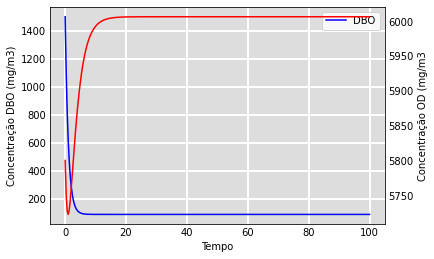

In [176]:
fig = plt.figure(facecolor = 'w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot (dt, L3, 'b', label = 'DBO')
ax1 = ax.twinx()
# for i in range(len(OD3)):
#     if OD3[i] <= 12419.999999999998:
#         ax1.plot (dt, OD3, 'r', label = 'OD')
#     else:
#         ax1.plot(dt, 12419.999999999998, 'r', label = 'OD')
ax1.plot (dt, OD3, 'r', label = 'OD')
ax.set_xlabel ('Tempo')
ax.set_ylabel ('Concentração DBO (mg/m3)')
ax1.set_ylabel('Concentração OD (mg/m3')
ax.yaxis.set_tick_params(length=0)
ax1.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    legend = ax.legend()
# legend2 = ax1.legend()
# legend2.get_frame().set_alpha(0.5)
# for spine in ('top', 'right', 'bottom', 'left'):
#     ax1.spines[spine].set_visible(False)
plt.show()

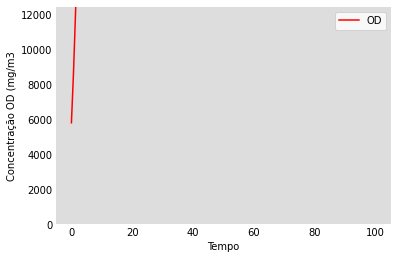

In [120]:
fig2 = plt.figure(facecolor = 'w')
ax1 = fig2.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax1.plot (dt, OD3, 'r', label = 'OD')
ax1.set_xlabel ('Tempo')
ax1.set_ylabel('Concentração OD (mg/m3')
ax1.set_ylim(0, 12419.999999999998)
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
#ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend1 = ax1.legend()
legend1.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)
    legend1 = ax1.legend()
plt.show()

In [153]:
Os = 9.0 *(10**3) #mgO2/m3
L_part = 0.5 #adimensional
alpha = 12.8 #ug/L = mg/m3
SOD = 1000 #gO2/m^2 d
H = 5.6 #m
v_s = 1 #m/d
Na = 0.157 * (10**3) #mgN/m3
        
kd = 0.2 #d^-1
ka = 0.3 #d^-1    
k_sed = v_s/H #d^-1
k_g = 2 #d^-1
r_ca = 50 #gC/gChla
r_oc = 2.67 #gO/gC
r_on = 4.2 #gO/gN 
k_ra = 0.05 #d^-1
k_n = 0.1 #d^-1
pa = r_oc*r_ca*k_g*alpha*(10**3) #mg/m3

w1 = 20.0 #mg/d
w2 = 5.0 #mg/d
V =  25.6 * (10**6) #m³

Q_F4 = 200000 #m3/d
Q_TD4 = 50000 #m3/d
Q_TE10 = 20000 #m3/d
Q_saida = 1 #m3/d
P = 0.5 #mm/d
E = 2 #mm/d
As = 5971000 #m2
# bal_hid = Q_F4 + Q_TD4 + Q_TE10 - Q_saida + P*As - E*As
bal_hid = 8689999.0

m1 = ((bal_hid + Q_saida + kd*V + k_sed*(1-L_part)*V) /V)
m2 = ((bal_hid - ka * V + Q_saida)/V)
carga1 = w1/V + r_ca*r_oc*k_ra*alpha
# carga2 = w2/V - kd*L + ka*Os - r_on*k_n*Na + pa - r_ca*r_oc*k_ra*alpha - SOD/H 
carga2 = w2/V - kd*L + ka*Os - r_on*k_n*Na - r_ca*r_oc*k_ra*alpha - SOD/H #pa retirado; ka dividido pela metade

dLdt = -L3*m1 + carga1
dODdt = -OD3*m2 + carga2

-OD3*m2 + carga2

# P*As - E*As


array([ 2.12122045e+03,  2.09674140e+03,  2.07121649e+03,  2.04482314e+03,
        2.01770880e+03,  1.98999606e+03,  1.96178688e+03,  1.93316604e+03,
        1.90420409e+03,  1.87495972e+03,  1.84548178e+03,  1.81581096e+03,
        1.78598111e+03,  1.75602044e+03,  1.72595245e+03,  1.69579672e+03,
        1.66556956e+03,  1.63528457e+03,  1.60495310e+03,  1.57458461e+03,
        1.54418698e+03,  1.51376679e+03,  1.48332954e+03,  1.45287982e+03,
        1.42242145e+03,  1.39195762e+03,  1.36149101e+03,  1.33102385e+03,
        1.30055799e+03,  1.27009500e+03,  1.23963617e+03,  1.20918260e+03,
        1.17873518e+03,  1.14829468e+03,  1.11786174e+03,  1.08743688e+03,
        1.05702055e+03,  1.02661312e+03,  9.96214899e+02,  9.65826146e+02,
        9.35447077e+02,  9.05077874e+02,  8.74718686e+02,  8.44369641e+02,
        8.14030843e+02,  7.83702379e+02,  7.53384322e+02,  7.23076732e+02,
        6.92779660e+02,  6.62493146e+02,  6.32217224e+02,  6.01951923e+02,
        5.71697266e+02,  

In [108]:
for i in range(len(OD3)):
    if i <= 12419.999999999998:
        ax1.plot (dt, OD3, 'r', label = 'OD')
    else:
        ax1.plot(dt, 12419.999999999998, 'r', label = 'OD')

ax1

<AxesSubplot:ylabel='Concentração OD (mg/m3'>